In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder, minmax_scale
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import sys 
#from keras.models import Sequential
#from keras.layers import Dense
#from keras.utils import np_utils
import tensorflow as tf
#from keras.regularizers import L1L2
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, cohen_kappa_score
from sklearn.utils import shuffle
#from keras.callbacks import EarlyStopping
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from featurewiz import featurewiz
from sklearn.metrics import f1_score
from sklearn.feature_selection import SelectKBest, f_classif, chi2, RFE
from sklearn.feature_selection import mutual_info_classif
from scipy import stats
np.random.seed(19680801)

Imported version = 0.1.70.
from featurewiz import FeatureWiz
wiz = FeatureWiz(verbose=1)
X_train_selected = wiz.fit_transform(X_train, y_train)
X_test_selected = wiz.transform(X_test)
wiz.features  ### provides a list of selected features ###
                                


In [2]:
##preprocess the main training file(training_step1.py)
data = pd.read_csv("gold_control_datapoints_prized_samp_fda.csv")
data = data.sort_values(by=['cluster'])
data = shuffle(data)
data = shuffle(data)
data = shuffle(data)
data = shuffle(data)
data = shuffle(data)
data = shuffle(data)
data = shuffle(data)
data = shuffle(data)
data = shuffle(data)
data = shuffle(data)
print(len(data))
data.dropna(axis=0, inplace= True)
print(len(data))
data['class'] = data['class'].astype(int)
#print(data.dtypes)
#data = data[data.year >= 1984]
data = data.sort_values(by=['year'])
data.to_csv("data_84.csv", index = False)
print(len(data))

244
242
242


printing  pct_is_new                   float64
n_biggest_anc                float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
pct_is_new                   0.176661
n_biggest_anc                0.028795
pct_of_secbiggest_anc_new    0.002280
pct_top_5_anc                0.031210
wrcr                         0.065790
rcr_mid                      0.128799
rcr_hi                       0.063565
human                        0.100670
animal                       0.070585
molecular_cellular           0.032694
is_clinical                  0.192077
is_

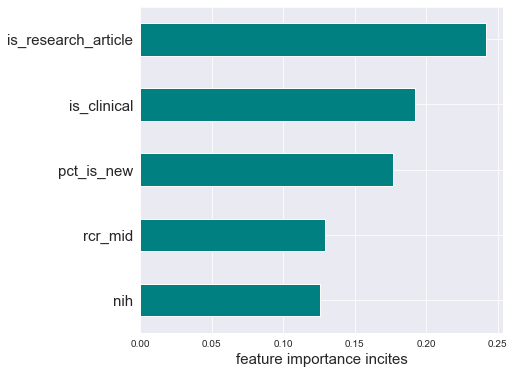

[-0.22439577] [[ 12.41259617  11.22741458  -1.57533752   0.88958455 -10.5591439
    3.21312737  -0.40462228   6.6043673    5.26118089   5.43251376
    5.95678611  -9.07307702   0.20128058  -2.6436149   -0.3569133 ]] 0.8305785123966942
cross validated f1 score  0.8039235764235764


In [2]:
##Best f1 score for logistic regression on incites edge type
##Logistic Regression
##best f1 score logistic model
x_train = pd.read_csv("data_84.csv")
y_train = x_train['class']
'''x_train = x_train.drop(['class','cluster','year','n','pct_dusted_ccn','pct_dusted_rmcl',
                           'pct_in_secbiggest_anc','rcr_low','secbiggest_anc',
                           'pct_of_biggest_anc_newish','pct_of_biggest_anc_new','n_clusts_90_anc','pct_of_secbiggest_anc'
                           ,'pct_in_biggest_anc','biggest_anc','pct_of_secbiggest_anc_newish','n_secbiggest_anc'
                            ], axis = 1)'''

x_train[['wrcr','n_biggest_anc','n_secbiggest_anc','n_clusts_90_anc','pct_of_biggest_anc_new']] = minmax_scale(x_train[['wrcr','n_biggest_anc','n_secbiggest_anc','n_clusts_90_anc','pct_of_biggest_anc_new']])
x_train = x_train.drop(['n_secbiggest_anc','n_clusts_90_anc','cluster','year','n','pct_is_newish','pct_dusted_ccn','pct_dusted_rmcl','biggest_anc','pct_in_biggest_anc','pct_of_biggest_anc','pct_of_biggest_anc_new','pct_of_biggest_anc_newish','secbiggest_anc'], axis = 1)#$%
    #x_train = x_train.drop(['pct_of_biggest_anc_new','pct_of_secbiggest_anc_new','animal','pct_is_newish'], axis = 1)
x_train = x_train.drop(['pct_in_secbiggest_anc','pct_of_secbiggest_anc','pct_of_secbiggest_anc_newish','rcr_low','class'], axis = 1)

print("printing ",x_train.dtypes)

sns.set_style('darkgrid')
sns.set_palette('Set2')
fig = plt.figure(figsize=(6.5,6))
importance = mutual_info_classif(x_train,y_train)
feat_imp = pd.Series(importance,x_train.columns[0:len(x_train.columns)])
print(feat_imp)
feat_imp = feat_imp.sort_values(ascending=True)
feat_imp = feat_imp.tail(5)
feat_imp.plot(kind = 'barh',color = 'teal')
plt.xlabel("feature importance incites",fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()
fig.savefig("best_f1_incite.png")

#x_train =  StandardScaler().fit_transform(x_train) 

y_train = np.array(y_train)
model = LogisticRegression(random_state=0, C = 100).fit(x_train,y_train) ##logistioc
    
print(model.intercept_, model.coef_, model.score(x_train, y_train))
scores = cross_val_score(model, x_train, y_train, cv=20,scoring = "f1")
print("cross validated f1 score ",scores.mean())

actual len  4939
len of xtest  358
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                float64
pct_of_biggest_anc           float64
n_secbiggest_anc             float64
pct_of_secbiggest_anc        float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  242
len of xtrain  239
year   1978
[1979 1992 1993 1994 1995 1997 1998 1999 2000 2003 2005 2007 2008 2009
 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]
cv score  0.7677946690990171
(358,)
no of positive  72
len of predy  7

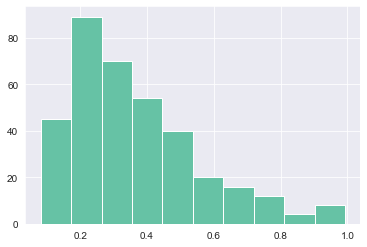

$$$  358   72
total positive  72
tp tn fp fn 0   0   0   0
year  1978 positive  0
actual len  5213
len of xtest  391
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                float64
pct_of_biggest_anc           float64
n_secbiggest_anc             float64
pct_of_secbiggest_anc        float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  242
len of xtrain  237
year   1979
[1992 1993 1994 1995 1997 1998 1999 2000 2003 2005 2007 2008 2009 2010
 2011 2012 2013 2014 2015 2016 2017 2018 2019

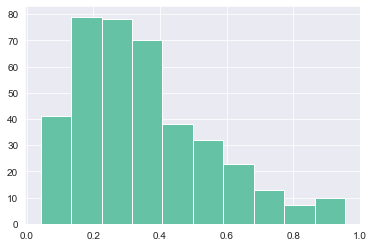

$$$  391   84
total positive  84
tp tn fp fn 1   1   0   0
year  1979 positive  1
actual len  5453
len of xtest  420
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                float64
pct_of_biggest_anc           float64
n_secbiggest_anc             float64
pct_of_secbiggest_anc        float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  242
len of xtrain  239
year   1980
[1979 1992 1993 1994 1995 1997 1998 1999 2000 2003 2005 2007 2008 2009
 2010 2011 2012 2013 2014 2015 2016 2017 2018

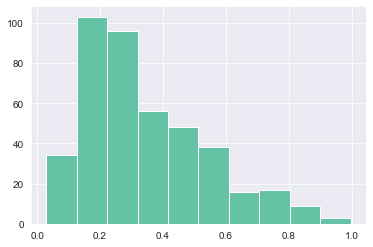

$$$  420   89
total positive  89
tp tn fp fn 0   0   0   0
year  1980 positive  0
actual len  5700
len of xtest  470
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                float64
pct_of_biggest_anc           float64
n_secbiggest_anc             float64
pct_of_secbiggest_anc        float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  242
len of xtrain  239
year   1981
[1979 1992 1993 1994 1995 1997 1998 1999 2000 2003 2005 2007 2008 2009
 2010 2011 2012 2013 2014 2015 2016 2017 2018

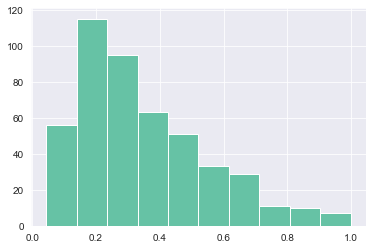

$$$  470   103
total positive  103
tp tn fp fn 0   0   0   0
year  1981 positive  0
actual len  5958
len of xtest  497
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                  int64
pct_of_biggest_anc           float64
n_secbiggest_anc               int64
pct_of_secbiggest_anc        float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  242
len of xtrain  239
year   1982
[1979 1992 1993 1994 1995 1997 1998 1999 2000 2003 2005 2007 2008 2009
 2010 2011 2012 2013 2014 2015 2016 2017 20

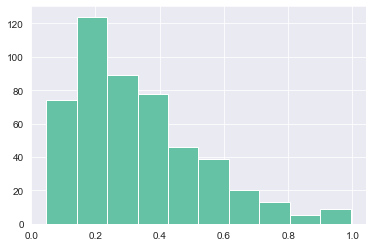

$$$  497   95
total positive  95
tp tn fp fn 0   0   0   0
year  1982 positive  0
actual len  6242
len of xtest  546
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                  int64
pct_of_biggest_anc           float64
n_secbiggest_anc               int64
pct_of_secbiggest_anc        float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  242
len of xtrain  239
year   1983
[1979 1992 1993 1994 1995 1997 1998 1999 2000 2003 2005 2007 2008 2009
 2010 2011 2012 2013 2014 2015 2016 2017 2018

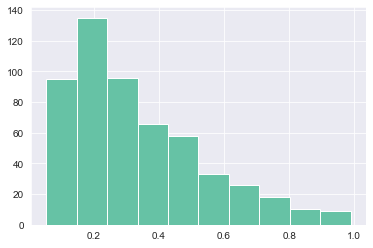

$$$  546   106
total positive  106
tp tn fp fn 0   0   0   0
year  1983 positive  0
actual len  6521
len of xtest  569
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                  int64
pct_of_biggest_anc           float64
n_secbiggest_anc               int64
pct_of_secbiggest_anc        float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  242
len of xtrain  239
year   1984
[1979 1992 1993 1994 1995 1997 1998 1999 2000 2003 2005 2007 2008 2009
 2010 2011 2012 2013 2014 2015 2016 2017 20

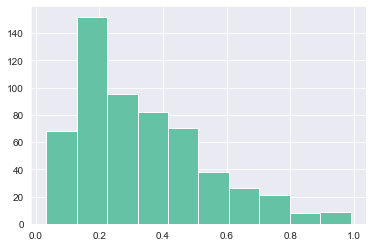

$$$  569   109
total positive  109
tp tn fp fn 0   0   0   0
year  1984 positive  0
actual len  6825
len of xtest  597
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                float64
pct_of_biggest_anc           float64
n_secbiggest_anc             float64
pct_of_secbiggest_anc        float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  242
len of xtrain  239
year   1985
[1979 1992 1993 1994 1995 1997 1998 1999 2000 2003 2005 2007 2008 2009
 2010 2011 2012 2013 2014 2015 2016 2017 20

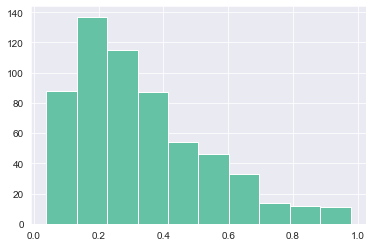

$$$  597   121
total positive  121
tp tn fp fn 0   0   0   0
year  1985 positive  0
actual len  7188
len of xtest  661
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                float64
pct_of_biggest_anc           float64
n_secbiggest_anc             float64
pct_of_secbiggest_anc        float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  242
len of xtrain  239
year   1986
[1979 1992 1993 1994 1995 1997 1998 1999 2000 2003 2005 2007 2008 2009
 2010 2011 2012 2013 2014 2015 2016 2017 20

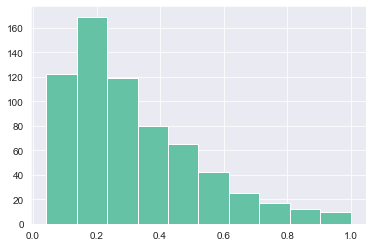

$$$  661   115
total positive  115
tp tn fp fn 0   0   0   0
year  1986 positive  0
actual len  7569
len of xtest  700
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                float64
pct_of_biggest_anc           float64
n_secbiggest_anc             float64
pct_of_secbiggest_anc        float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  242
len of xtrain  239
year   1987
[1979 1992 1993 1994 1995 1997 1998 1999 2000 2003 2005 2007 2008 2009
 2010 2011 2012 2013 2014 2015 2016 2017 20

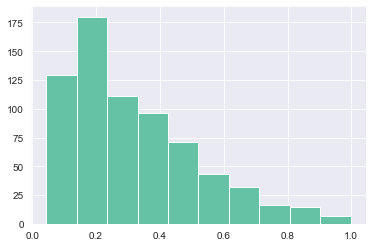

$$$  700   122
total positive  122
tp tn fp fn 0   0   0   0
year  1987 positive  0
actual len  7973
len of xtest  741
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                  int64
pct_of_biggest_anc           float64
n_secbiggest_anc               int64
pct_of_secbiggest_anc        float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  242
len of xtrain  239
year   1988
[1979 1992 1993 1994 1995 1997 1998 1999 2000 2003 2005 2007 2008 2009
 2010 2011 2012 2013 2014 2015 2016 2017 20

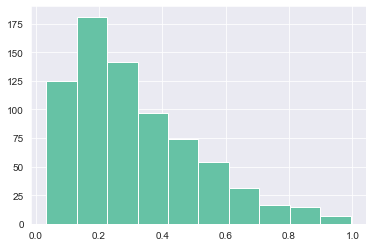

$$$  741   131
total positive  131
tp tn fp fn 0   0   0   0
year  1988 positive  0
actual len  8315
len of xtest  758
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                float64
pct_of_biggest_anc           float64
n_secbiggest_anc             float64
pct_of_secbiggest_anc        float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  242
len of xtrain  239
year   1989
[1979 1992 1993 1994 1995 1997 1998 1999 2000 2003 2005 2007 2008 2009
 2010 2011 2012 2013 2014 2015 2016 2017 20

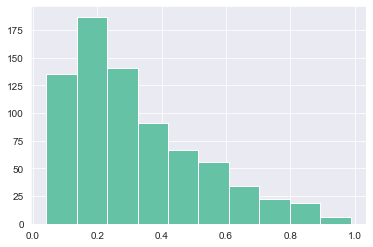

$$$  758   145
total positive  145
tp tn fp fn 0   0   0   0
year  1989 positive  0
actual len  8642
len of xtest  809
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                float64
pct_of_biggest_anc           float64
n_secbiggest_anc             float64
pct_of_secbiggest_anc        float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  242
len of xtrain  239
year   1990
[1979 1992 1993 1994 1995 1997 1998 1999 2000 2003 2005 2007 2008 2009
 2010 2011 2012 2013 2014 2015 2016 2017 20

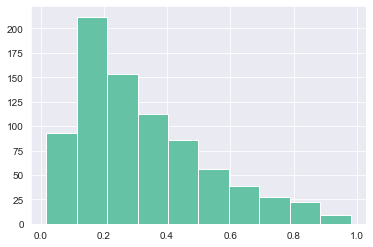

$$$  809   152
total positive  152
tp tn fp fn 0   0   0   0
year  1990 positive  0
actual len  9018
len of xtest  856
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                float64
pct_of_biggest_anc           float64
n_secbiggest_anc             float64
pct_of_secbiggest_anc        float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  242
len of xtrain  239
year   1991
[1979 1992 1993 1994 1995 1997 1998 1999 2000 2003 2005 2007 2008 2009
 2010 2011 2012 2013 2014 2015 2016 2017 20

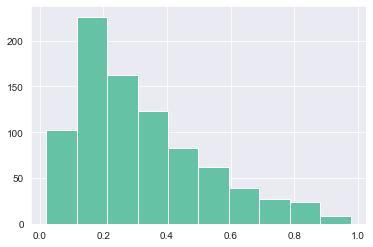

$$$  856   158
total positive  158
tp tn fp fn 0   0   0   0
year  1991 positive  0
actual len  9369
len of xtest  886
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                float64
pct_of_biggest_anc           float64
n_secbiggest_anc             float64
pct_of_secbiggest_anc        float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  242
len of xtrain  237
year   1992
[1979 1993 1994 1995 1997 1998 1999 2000 2003 2005 2007 2008 2009 2010
 2011 2012 2013 2014 2015 2016 2017 2018 20

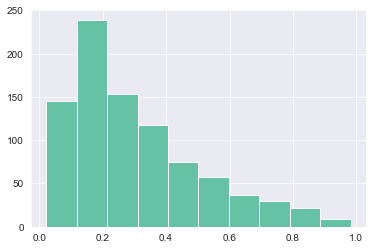

$$$  886   157
total positive  157
tp tn fp fn 0   0   0   0
year  1992 positive  0
actual len  9723
len of xtest  954
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                float64
pct_of_biggest_anc           float64
n_secbiggest_anc             float64
pct_of_secbiggest_anc        float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  242
len of xtrain  237
year   1993
[1979 1992 1994 1995 1997 1998 1999 2000 2003 2005 2007 2008 2009 2010
 2011 2012 2013 2014 2015 2016 2017 2018 20

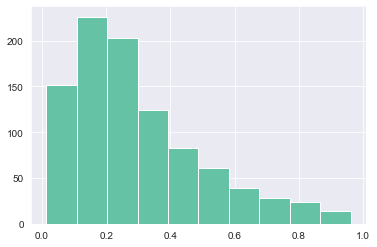

$$$  954   159
total positive  159
tp tn fp fn 0   0   0   0
year  1993 positive  0
actual len  10084
len of xtest  1050
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                  int64
pct_of_biggest_anc           float64
n_secbiggest_anc               int64
pct_of_secbiggest_anc        float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  242
len of xtrain  235
year   1994
[1979 1992 1993 1995 1997 1998 1999 2000 2003 2005 2007 2008 2009 2010
 2011 2012 2013 2014 2015 2016 2017 2018 

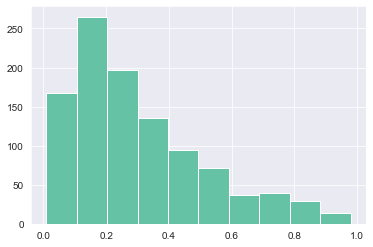

$$$  1050   188
total positive  188
tp tn fp fn 1   1   0   0
year  1994 positive  1
actual len  10442
len of xtest  1083
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                float64
pct_of_biggest_anc           float64
n_secbiggest_anc             float64
pct_of_secbiggest_anc        float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  242
len of xtrain  237
year   1995
[1979 1992 1993 1994 1997 1998 1999 2000 2003 2005 2007 2008 2009 2010
 2011 2012 2013 2014 2015 2016 2017 2018

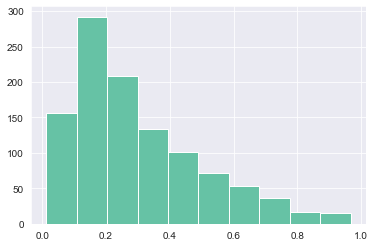

$$$  1083   187
total positive  187
tp tn fp fn 0   0   0   1
year  1995 positive  1
actual len  10806
len of xtest  1170
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                float64
pct_of_biggest_anc           float64
n_secbiggest_anc             float64
pct_of_secbiggest_anc        float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  242
len of xtrain  239
year   1996
[1979 1992 1993 1994 1995 1997 1998 1999 2000 2003 2005 2007 2008 2009
 2010 2011 2012 2013 2014 2015 2016 2017

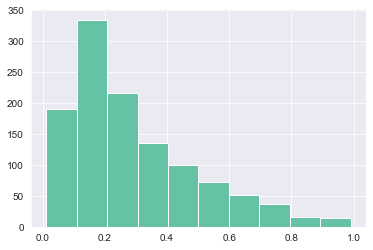

$$$  1170   195
total positive  195
tp tn fp fn 0   0   0   0
year  1996 positive  0
actual len  11161
len of xtest  1252
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                float64
pct_of_biggest_anc           float64
n_secbiggest_anc             float64
pct_of_secbiggest_anc        float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  242
len of xtrain  237
year   1997
[1979 1992 1993 1994 1995 1998 1999 2000 2003 2005 2007 2008 2009 2010
 2011 2012 2013 2014 2015 2016 2017 2018

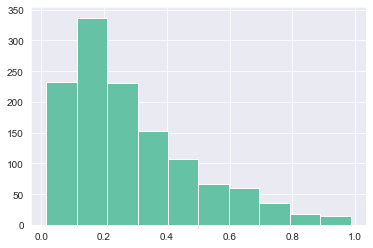

$$$  1252   196
total positive  196
tp tn fp fn 0   1   0   0
year  1997 positive  0
actual len  11526
len of xtest  1320
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                  int64
pct_of_biggest_anc           float64
n_secbiggest_anc               int64
pct_of_secbiggest_anc        float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  242
len of xtrain  233
year   1998
[1979 1992 1993 1994 1995 1997 1999 2000 2003 2005 2007 2008 2009 2010
 2011 2012 2013 2014 2015 2016 2017 2018

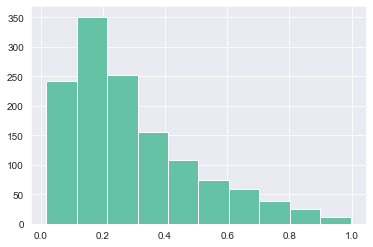

$$$  1320   216
total positive  216
tp tn fp fn 2   2   0   1
year  1998 positive  3
actual len  11998
len of xtest  1386
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                float64
pct_of_biggest_anc           float64
n_secbiggest_anc             float64
pct_of_secbiggest_anc        float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  242
len of xtrain  237
year   1999
[1979 1992 1993 1994 1995 1997 1998 2000 2003 2005 2007 2008 2009 2010
 2011 2012 2013 2014 2015 2016 2017 2018

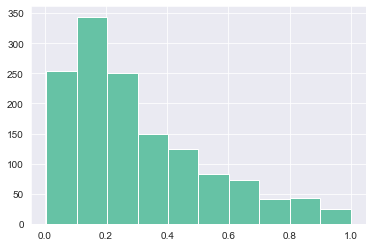

$$$  1386   268
total positive  268
tp tn fp fn 0   0   0   1
year  1999 positive  1
actual len  12451
len of xtest  1425
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                float64
pct_of_biggest_anc           float64
n_secbiggest_anc             float64
pct_of_secbiggest_anc        float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  242
len of xtrain  235
year   2000
[1979 1992 1993 1994 1995 1997 1998 1999 2003 2005 2007 2008 2009 2010
 2011 2012 2013 2014 2015 2016 2017 2018

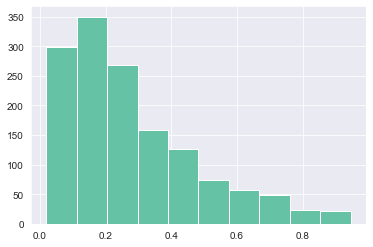

$$$  1425   210
total positive  210
tp tn fp fn 1   0   0   1
year  2000 positive  2
actual len  12969
len of xtest  1443
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                float64
pct_of_biggest_anc           float64
n_secbiggest_anc             float64
pct_of_secbiggest_anc        float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  242
len of xtrain  239
year   2001
[1979 1992 1993 1994 1995 1997 1998 1999 2000 2003 2005 2007 2008 2009
 2010 2011 2012 2013 2014 2015 2016 2017

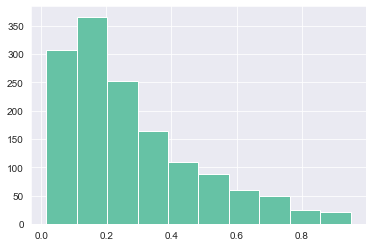

$$$  1443   228
total positive  228
tp tn fp fn 0   0   0   0
year  2001 positive  0
actual len  13522
len of xtest  1457
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                float64
pct_of_biggest_anc           float64
n_secbiggest_anc             float64
pct_of_secbiggest_anc        float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  242
len of xtrain  239
year   2002
[1979 1992 1993 1994 1995 1997 1998 1999 2000 2003 2005 2007 2008 2009
 2010 2011 2012 2013 2014 2015 2016 2017

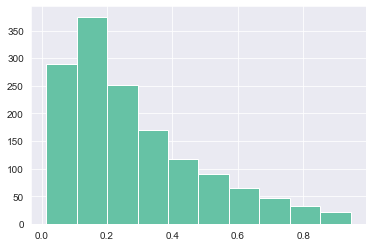

$$$  1457   234
total positive  234
tp tn fp fn 0   0   0   0
year  2002 positive  0
actual len  14061
len of xtest  1486
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                float64
pct_of_biggest_anc           float64
n_secbiggest_anc             float64
pct_of_secbiggest_anc        float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  242
len of xtrain  237
year   2003
[1979 1992 1993 1994 1995 1997 1998 1999 2000 2005 2007 2008 2009 2010
 2011 2012 2013 2014 2015 2016 2017 2018

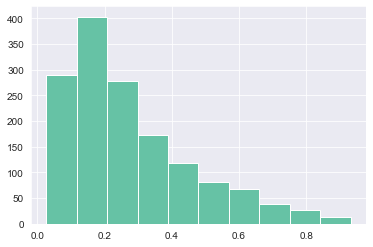

$$$  1486   200
total positive  200
tp tn fp fn 0   0   0   1
year  2003 positive  1
actual len  14609
len of xtest  1484
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                float64
pct_of_biggest_anc           float64
n_secbiggest_anc             float64
pct_of_secbiggest_anc        float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  242
len of xtrain  239
year   2004
[1979 1992 1993 1994 1995 1997 1998 1999 2000 2003 2005 2007 2008 2009
 2010 2011 2012 2013 2014 2015 2016 2017

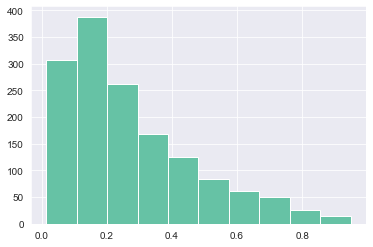

$$$  1484   214
total positive  214
tp tn fp fn 0   0   0   0
year  2004 positive  0
actual len  15194
len of xtest  1512
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                float64
pct_of_biggest_anc           float64
n_secbiggest_anc             float64
pct_of_secbiggest_anc        float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  242
len of xtrain  235
year   2005
[1979 1992 1993 1994 1995 1997 1998 1999 2000 2003 2007 2008 2009 2010
 2011 2012 2013 2014 2015 2016 2017 2018

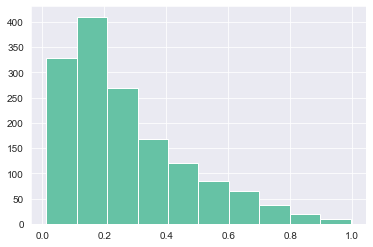

$$$  1512   218
total positive  218
tp tn fp fn 1   1   0   1
year  2005 positive  2
actual len  15905
len of xtest  1566
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                float64
pct_of_biggest_anc           float64
n_secbiggest_anc             float64
pct_of_secbiggest_anc        float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  242
len of xtrain  239
year   2006
[1979 1992 1993 1994 1995 1997 1998 1999 2000 2003 2005 2007 2008 2009
 2010 2011 2012 2013 2014 2015 2016 2017

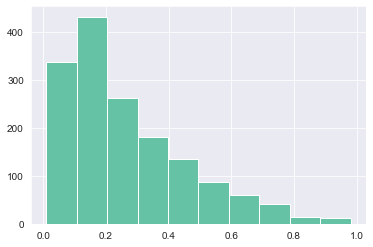

$$$  1566   211
total positive  211
tp tn fp fn 0   0   0   0
year  2006 positive  0
actual len  16546
len of xtest  1569
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                float64
pct_of_biggest_anc           float64
n_secbiggest_anc             float64
pct_of_secbiggest_anc        float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  242
len of xtrain  231
year   2007
[1979 1992 1993 1994 1995 1997 1998 1999 2000 2003 2005 2008 2009 2010
 2011 2012 2013 2014 2015 2016 2017 2018

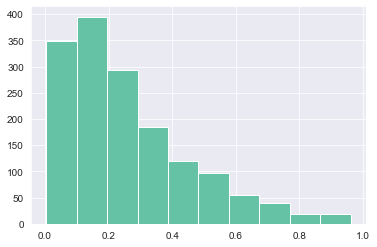

$$$  1569   209
total positive  209
tp tn fp fn 2   3   0   0
year  2007 positive  2
actual len  17295
len of xtest  1600
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                float64
pct_of_biggest_anc           float64
n_secbiggest_anc             float64
pct_of_secbiggest_anc        float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  242
len of xtrain  237
year   2008
[1979 1992 1993 1994 1995 1997 1998 1999 2000 2003 2005 2007 2009 2010
 2011 2012 2013 2014 2015 2016 2017 2018

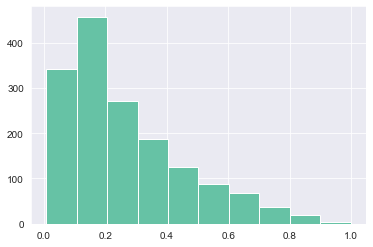

$$$  1600   218
total positive  218
tp tn fp fn 0   0   0   0
year  2008 positive  0
actual len  18046
len of xtest  1622
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                float64
pct_of_biggest_anc           float64
n_secbiggest_anc             float64
pct_of_secbiggest_anc        float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  242
len of xtrain  227
year   2009
[1979 1992 1993 1994 1995 1997 1998 1999 2000 2003 2005 2007 2008 2010
 2011 2012 2013 2014 2015 2016 2017 2018

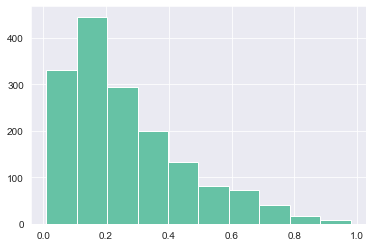

$$$  1622   219
total positive  219
tp tn fp fn 4   1   0   1
year  2009 positive  5
actual len  18754
len of xtest  1669
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                float64
pct_of_biggest_anc           float64
n_secbiggest_anc             float64
pct_of_secbiggest_anc        float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  242
len of xtrain  220
year   2010
[1979 1992 1993 1994 1995 1997 1998 1999 2000 2003 2005 2007 2008 2009
 2011 2012 2013 2014 2015 2016 2017 2018

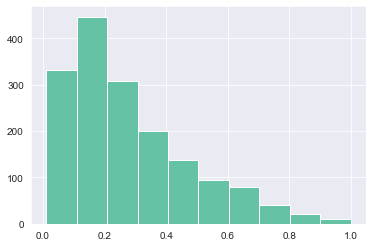

$$$  1669   248
total positive  248
tp tn fp fn 4   3   1   2
year  2010 positive  6
actual len  19515
len of xtest  1705
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                float64
pct_of_biggest_anc           float64
n_secbiggest_anc             float64
pct_of_secbiggest_anc        float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  242
len of xtrain  215
year   2011
[1979 1992 1993 1994 1995 1997 1998 1999 2000 2003 2005 2007 2008 2009
 2010 2012 2013 2014 2015 2016 2017 2018

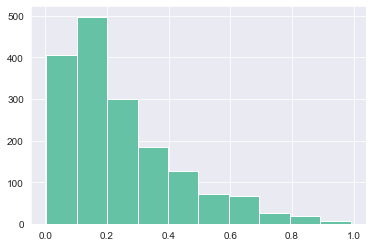

$$$  1705   186
total positive  186
tp tn fp fn 6   1   1   4
year  2011 positive  10
actual len  20250
len of xtest  1733
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                float64
pct_of_biggest_anc           float64
n_secbiggest_anc             float64
pct_of_secbiggest_anc        float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  242
len of xtrain  219
year   2012
[1979 1992 1993 1994 1995 1997 1998 1999 2000 2003 2005 2007 2008 2009
 2010 2011 2013 2014 2015 2016 2017 201

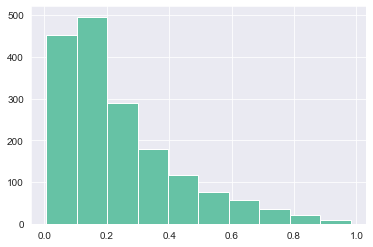

$$$  1733   194
total positive  194
tp tn fp fn 5   3   2   3
year  2012 positive  8
actual len  21177
len of xtest  1793
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                float64
pct_of_biggest_anc           float64
n_secbiggest_anc             float64
pct_of_secbiggest_anc        float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  242
len of xtrain  217
year   2013
[1979 1992 1993 1994 1995 1997 1998 1999 2000 2003 2005 2007 2008 2009
 2010 2011 2012 2014 2015 2016 2017 2018

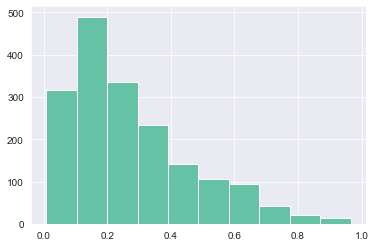

$$$  1793   262
total positive  262
tp tn fp fn 8   3   1   1
year  2013 positive  9
actual len  22051
len of xtest  1874
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                float64
pct_of_biggest_anc           float64
n_secbiggest_anc             float64
pct_of_secbiggest_anc        float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  242
len of xtrain  213
year   2014
[1979 1992 1993 1994 1995 1997 1998 1999 2000 2003 2005 2007 2008 2009
 2010 2011 2012 2013 2015 2016 2017 2018

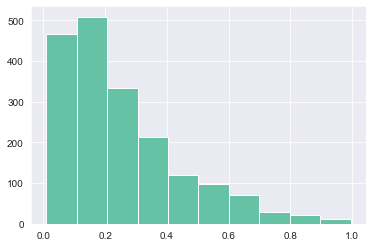

$$$  1874   236
total positive  236
tp tn fp fn 7   2   1   5
year  2014 positive  12
actual len  23031
len of xtest  1902
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                float64
pct_of_biggest_anc           float64
n_secbiggest_anc             float64
pct_of_secbiggest_anc        float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  242
len of xtrain  227
year   2015
[1979 1992 1993 1994 1995 1997 1998 1999 2000 2003 2005 2007 2008 2009
 2010 2011 2012 2013 2014 2016 2017 201

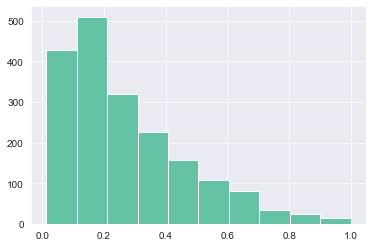

$$$  1902   268
total positive  268
tp tn fp fn 3   3   1   1
year  2015 positive  4
actual len  23994
len of xtest  1966
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                float64
pct_of_biggest_anc           float64
n_secbiggest_anc             float64
pct_of_secbiggest_anc        float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  242
len of xtrain  227
year   2016
[1979 1992 1993 1994 1995 1997 1998 1999 2000 2003 2005 2007 2008 2009
 2010 2011 2012 2013 2014 2015 2017 2018

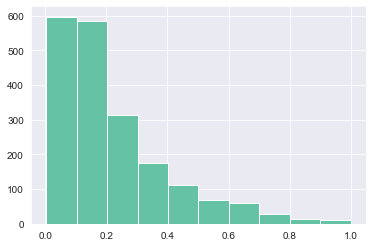

$$$  1966   183
total positive  183
tp tn fp fn 0   2   0   6
year  2016 positive  6
actual len  24970
len of xtest  2012
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                float64
pct_of_biggest_anc           float64
n_secbiggest_anc             float64
pct_of_secbiggest_anc        float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  242
len of xtrain  223
year   2017
[1979 1992 1993 1994 1995 1997 1998 1999 2000 2003 2005 2007 2008 2009
 2010 2011 2012 2013 2014 2015 2016 2018

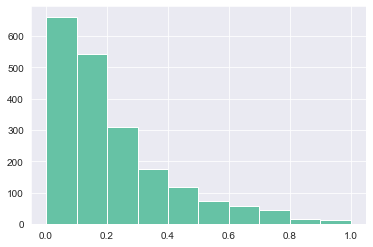

$$$  2012   203
total positive  203
tp tn fp fn 3   1   2   5
year  2017 positive  8
actual len  26037
len of xtest  2088
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                float64
pct_of_biggest_anc           float64
n_secbiggest_anc             float64
pct_of_secbiggest_anc        float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  242
len of xtrain  227
year   2018
[1979 1992 1993 1994 1995 1997 1998 1999 2000 2003 2005 2007 2008 2009
 2010 2011 2012 2013 2014 2015 2016 2017

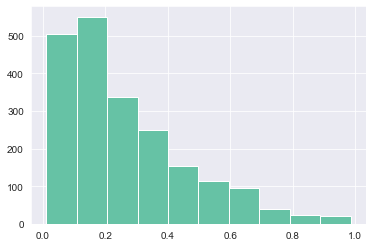

$$$  2088   289
total positive  289
tp tn fp fn 4   2   1   1
year  2018 positive  5
actual len  27104
len of xtest  2162
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                float64
pct_of_biggest_anc           float64
n_secbiggest_anc             float64
pct_of_secbiggest_anc        float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  242
len of xtrain  225
year   2019
[1979 1992 1993 1994 1995 1997 1998 1999 2000 2003 2005 2007 2008 2009
 2010 2011 2012 2013 2014 2015 2016 2017

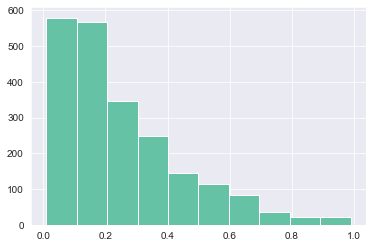

$$$  2162   277
total positive  277
tp tn fp fn 1   2   0   4
year  2019 positive  5
actual len  28585
len of xtest  2267
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                float64
pct_of_biggest_anc           float64
n_secbiggest_anc             float64
pct_of_secbiggest_anc        float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  242
len of xtrain  231
year   2020
[1979 1992 1993 1994 1995 1997 1998 1999 2000 2003 2005 2007 2008 2009
 2010 2011 2012 2013 2014 2015 2016 2017

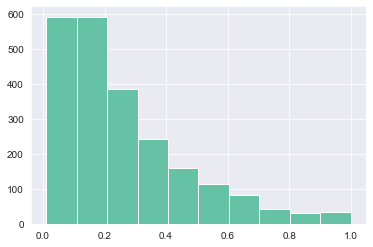

$$$  2267   314
total positive  314
tp tn fp fn 2   2   0   2
year  2020 positive  4
total pos  96  true pos  55  total false pos  184.51162790697674 0.7625189490891957


In [8]:
##logistic regression: unified model for all
def recall(pred,th, yr):
    data = pd.read_csv("data_84.csv")
    data = data[data['year'] == yr]
    data = data[data['n'] > 100]

    tot = 0
    res = pd.merge(data,pred,on='cluster', how = 'inner')
    tp,tn,fp, fn = 0,0,0,0
    for ind in res.index:
        if res['class'][ind] == 1 and res['pred_log'][ind] >= th:
            tp += 1
        elif res['class'][ind] == 0 and res['pred_log'][ind] < th:
            tn += 1
        elif res['class'][ind] == 0 and res['pred_log'][ind] >= th:
            fp += 1
        elif res['class'][ind] == 1 and res['pred_log'][ind] < th:
            fn += 1
    pred = pred[pred['pred_log'] >= th]
    print("total positive ", len(pred))
    print("tp tn fp fn",tp," ",tn," ",fp," ",fn)
    total_pos = len(res[res['class'] == 1])
    print("year ",yr,"positive ",total_pos)
    
    
    #return total_pos,tp,len(pred[pred['pred_log'] >= th]) - tp
    return total_pos,tp,len(pred) - tp


def train(x_train):
    
    
  
    y_train = x_train['class']
    
    x_train = x_train.drop(['class','cluster','year','n','pct_dusted_ccn','pct_dusted_rmcl',
                           'pct_in_secbiggest_anc','rcr_low','secbiggest_anc',
                           'pct_of_biggest_anc_newish','pct_of_biggest_anc_new','n_clusts_90_anc'
                           ,'pct_in_biggest_anc','biggest_anc','pct_of_secbiggest_anc_newish'
                           ], axis = 1)
    
    x_train[['pct_of_biggest_anc','pct_is_newish','wrcr']] = minmax_scale(x_train[[
    'pct_of_biggest_anc','pct_is_newish','wrcr']])
    
    y_train = np.array(y_train)
 
    model = LogisticRegression(random_state=0, C = 1).fit(x_train,y_train) ##logistioc
    
    scores = cross_val_score(model, x_train, y_train, cv=10,scoring = "f1")
    print("cv score ", scores.mean())
    return model,scores.mean()
    
tot,tp,total_fp = 0,0,0
yr = 1978
CV = 0
while yr <= 2020:
    
    x_train = pd.read_csv("data_84.csv")
    x_test = pd.read_csv("~/Documents/PhD/project_nobel/boty/boty_incites/features_prediction_"+str(yr)+".csv")
    print("actual len ",len(x_test))
    x_test = x_test.dropna(axis=0)
    
    x_test = x_test[x_test['n'] > 100]
    
    x_test = x_test[x_test['rcr_hi'] >= 2.00]
    x_test = x_test[x_test['cited_by_clin'] >= 0.080]
    x_test = x_test[x_test['animal'] >= 0.01]
    x_test = x_test[x_test['molecular_cellular'] >= 0.020] ##this one, with C = 1
    x_test = x_test[x_test['human'] >= 0.20]
    print("len of xtest ",len(x_test))
       
    copy_test = x_test.copy()
    #print(x_test.tail(10))
    
    #x_test = x_test[x_test['is_research_article'] > 0.75]
    x_test = x_test.drop(['prediction','cluster','year','n',
                               'pct_in_secbiggest_anc','rcr_low','secbiggest_anc',
                               'pct_of_biggest_anc_newish','pct_of_biggest_anc_new','n_clusts_90_anc'
                               ,'pct_in_biggest_anc','biggest_anc','pct_of_secbiggest_anc_newish'
                               ], axis = 1)
    
    x_test[['pct_of_biggest_anc','pct_is_newish','wrcr']] = minmax_scale(x_test[[
    'pct_of_biggest_anc','pct_is_newish','wrcr']])
    
    print(x_test.dtypes)
  
    
    
    print("hdhdhd before ",len(x_train))
    x_train = x_train[x_train['year'] != yr]
    x_train = x_train[x_train['n'] > 100]

    
    #x_train = x_train[x_train['is_research_article'] > 0.75]
    print('len of xtrain ', len(x_train))
    print("year  ",yr)
    print(x_train['year'].unique())

    model,cv = train(x_train)
    CV += cv
    pred = model.predict(x_test)
    print(pred.shape)
    #print(np.sum(pred))
    print("no of positive ",np.count_nonzero(pred == 1))
    

    
    predy = model.predict_proba(x_test)
    pred_test = []
    for i in range(predy.shape[0]):
        pred_test.append(predy[i][1])
        '''if predy[i][0] >= predy[i][1]:
            #pred_test.append(0.00)
            pred_test.append(predy[i][1])
        else:
            pred_test.append(predy[i][1])'''
    
    predy = pd.DataFrame(predy, columns = ['col_0','col_1'])
    predy = predy[predy['col_1'] >= 0.50]
    #print("len of df ", len(df))
    print("len of predy ", len(predy))
    
    
    
    copy_test['pred_log'] = pred_test
    copy_test['pred_log'].hist()
    plt.show()
    
    
    print("$$$ ",len(copy_test)," ",len(copy_test[copy_test['pred_log'] >= 0.50]))
    a, b,c = recall(copy_test,0.50, yr)
    tot += a
    tp += b
    total_fp += c
    yr += 1
print("total pos ",tot," true pos ", tp," total false pos ",total_fp/43, CV/43)